# インポート

In [4]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import pandas_profiling as pdp
import numpy as np

import lightgbm as lgb

#回帰の可視化
#関数の処理で必要なライブラリ
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

from sklearn.ensemble import (
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)

import shap
# import xgboost

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


import warnings
warnings.filterwarnings('ignore')

# 関数

In [5]:
import gather_function

In [28]:
import importlib
importlib.reload(gather_function)

<module 'gather_function' from '/Users/ryosuke/Desktop/副業/AI Quest/assessment/gather_function.py'>

# データの読み込み

In [8]:
original_train_data = pd.read_csv('train.csv')
original_test_data = pd.read_csv('test.csv')

In [11]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

del train['id']
del test['id']

print('len(train)=', len(train))
print('len(test)', len(test))
print(len(test)/len(train))

len(train)= 55583
len(test) 18528
0.3333393303707968


In [12]:
train.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,33.788931,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,38.934810,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,40.695118,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,37.796728,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,40.785050,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


# 説明変数

|カラム|ヘッダ名称|データ型|説明|
|-|-|-|-|
|0|	id|	int| インデックスとして使用|
|1|	accommodates|	int|	収容可能人数|
|2|	amenities|	char|	アメニティ|
|3|	bathrooms|	float|	風呂数|
|4|	bed_type|	char|	ベッドの種類|
|5|	bedrooms|	float|	ベッドルーム数|
|6|	beds|	float|	ベッド数|
|7|	cancellation_policy|	char|	キャンセルポリシー|
|8|	city|	char|	都市|
|9|	cleaning_fee|	int|	クリーニング料金を含むか|
|10|	description|	char|	説明|
|11|	first_review|	char|	最初のレビュー日|
|12|	host_has_profile_pic|	int|	ホストの写真があるかどうか|
|13|	host_identity_verified|	int|	ホストの身元確認が取れているか|
|14|	host_response_rate|	char|	ホストの返信率|
|15|	host_since|	char|	ホストの登録日|
|16|	instant_bookable|	char|	即時予約可能か|
|17|	last_review	|char|	最後のレビュー日|
|18|	latitude|	float|	緯度|
|19|longitude|	float|	経度|
|20|	name|	char|	物件名|
|21|	neighbourhood|	char|	近隣情報|
|22|	number_of_reviews|	int|	レビュー数|
|23|	property_type|	char|	物件の種類|
|24|	review_scores_rating|	float|	レビュースコア|
|25|	room_type|	char|	部屋の種類|
|26|	thumbnail_url|	char|	サムネイル画像リンク|
|27|	zipcode|	int|	郵便番号|
|28|    y| float|	宿泊価格|

# トレーニング

In [26]:
train_y = train['y']
train_X = train.drop('y', axis=1)

## 説明変数の前処理

### EDA結果の追加

In [29]:
train_X_addEDA, max_amenities_list = gather_function.preprocessing(train_X)

100%|███████████████████████████████████████████| 86/86 [00:02<00:00, 29.61it/s]


In [32]:
train_X_addEDA[train_X_addEDA.columns[:99]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 99 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   accommodates                   55583 non-null  int64  
 1   bathrooms                      55583 non-null  int64  
 2   bed_type                       55583 non-null  object 
 3   bedrooms                       55583 non-null  int64  
 4   beds                           55583 non-null  int64  
 5   cancellation_policy            55583 non-null  object 
 6   city                           55583 non-null  object 
 7   cleaning_fee                   55583 non-null  object 
 8   host_has_profile_pic           55583 non-null  object 
 9   host_identity_verified         55583 non-null  object 
 10  host_response_rate             55583 non-null  int64  
 11  instant_bookable               55583 non-null  object 
 12  latitude                       55583 non-null 

In [33]:
train_X_addEDA[train_X_addEDA.columns[100:]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Wide clearance to bed                55583 non-null  object 
 1   Accessible-height bed                55583 non-null  object 
 2   Fixed grab bars for shower & toilet  55583 non-null  object 
 3   Bathtub with shower chair            55583 non-null  object 
 4   Roll-in shower with chair            55583 non-null  object 
 5   Accessible-height toilet             55583 non-null  object 
 6   Wide clearance to shower & toilet    55583 non-null  object 
 7   Wide entryway                        55583 non-null  object 
 8   Waterfront                           55583 non-null  object 
 9   Handheld shower head                 55583 non-null  object 
 10  rare_amenities_count                 55583 non-null  int64  
 11  description_word_count      

### 対数変換した説明変数を追加

['beds_par_1', 'bathrooms_par_1', 'bathrooms', 'review_score_total', 'number_of_reviews', 'beds', 'accommodates', 'bedrooms', 'bedrooms_par_1', 'rare_amenities_count', 'amenities_count', 'latitude', 'host_response_rate_weight', 'review_score_weight', 'description_word_count', 'host_response_rate']


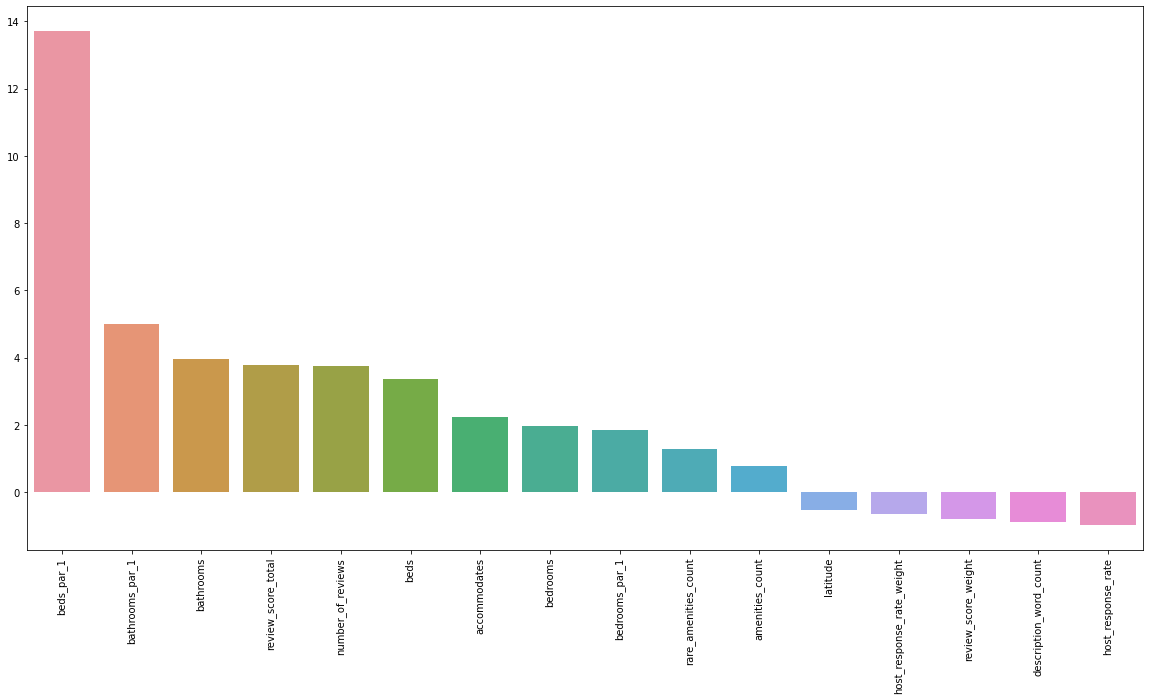

In [35]:
train_X_addEDA_log, num_col_feat_list, pt = gather_function.logarithmic_transformation(train_X_addEDA)

In [36]:
train_X_addEDA_log.head()

,accommodates,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,bathrooms_par_1,bedrooms_par_1,beds_par_1,bed_par_bedrooms,latitude_int,longitude_int,review_score_total,review_score_weight,amenities_count,TV,Cable TV,Wireless Internet,Air conditioning,Kitchen,Free parking on premises,Pets allowed,Breakfast,Elevator,Hot tub,Indoor fireplace,Heating,Family/kid friendly,Suitable for events,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Keypad,Private entrance,Baby monitor,Bathtub,Baby bath,Changing table,Children’s books and toys,Window guards,Table corner guards,Fireplace guards,Babysitter recommendations,Crib,Room-darkening shades,Game console,Hot water,Bed linens,Extra pillows and blankets,Ethernet connection,Pocket wifi,Microwave,Coffee maker,Refrigerator,Dishwasher,Dishes and silverware,Cooking basics,Oven,Stove,EV charger,Single level home,BBQ grill,Patio or balcony,Garden or backyard,Beach essentials,Luggage dropoff allowed,Long term stays allowed,Wide hallway clearance,Step-free access,Wide doorway,Flat,smooth pathway to front door,Well-lit path to entrance,Disabled parking spot,Wide clearance to bed,Accessible-height bed,Fixed grab bars for shower & toilet,Bathtub with shower chair,Roll-in shower with chair,Accessible-height toilet,Wide clearance to shower & toilet,Wide entryway,Waterfront,Handheld shower head,rare_amenities_count,description_word_count,host_response_rate_weight,first_review_Year,first_review_Month,first_review_Day,BusinessOld,host_since_Year,host_since_Month,host_since_Day,BusinessOld2,first_reviewOld,last_review_Year,last_review_Month,last_review_Day,BusinessOld3,BusinessUpdate,BusinessPeriod,thumbnail_url_str,zipcode_int,Log_beds_par_1,Log_bathrooms_par_1,Log_bathrooms,Log_review_score_total,Log_number_of_reviews,Log_beds,Log_accommodates,Log_bedrooms,Log_bedrooms_par_1,Log_rare_amenities_count,Log_amenities_count,Log_latitude,Log_host_response_rate_weight,Log_review_score_weight,Log_description_word_count,Log_host_response_rate
0,6,2,Real Bed,1,4,flexible,LA,t,t,f,0,f,33.788931,-118.154761,Na,1,Apartment,60.0,Private room,NaN,0.333333,0.166667,0.666667,4.0,33,-118,60.0,0.594059,7,True,False,True,False,True,True,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,6,379,0.000000,2016.0,7.0,27.0,2809.0,2016.0,7.0,13.0,3054.0,14.0,2016.0,7.0,27.0,2809.0,1982.0,0.0,nan,90804,0.555377,-0.482101,1.687346,-0.634382,-0.833205,1.729006,1.393625,-0.180486,-1.190409,-1.670391,-1.659013,-1.398199,-1.609670,-0.307101,-1.316664,-1.666098
1,2,1,Real Bed,1,1,strict,DC,t,t,t,100,f,38.934810,-76.978190,Brookland,9,House,100.0,Private room,1.0,0.500000,0.500000,0.500000,1.0,38,-76,900.0,0.917431,22,True,True,True,True,True,True,False,False,False,False,False,True,False,False,True,True,True,True,True,False,False,True,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,24,406,91.743119,2016.0,9.0,12.0,2856.0,2015.0,12.0,30.0,2858.0,257.0,2017.0,3.0,31.0,3056.0,1735.0,200.0,1,20018,-0.25

### カテゴリ変数化

In [37]:
#one-hot変換をせずにlabelencodingする → カテゴリ変数化
categorical_columns = ['neighbourhood']

In [38]:
train_X_addEDA_log_dummy = gather_function.process_categorical(train_X_addEDA_log, categorical_columns)

100%|████████████████████████████████████████████| 1/1 [00:00<00:00, 793.62it/s]


In [39]:
train_X_addEDA_log_dummy[train_X_addEDA_log_dummy.columns[:99]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 99 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   accommodates                         55583 non-null  int64   
 1   bathrooms                            55583 non-null  int64   
 2   bedrooms                             55583 non-null  int64   
 3   beds                                 55583 non-null  int64   
 4   host_response_rate                   55583 non-null  int64   
 5   latitude                             55583 non-null  float64 
 6   longitude                            55583 non-null  float64 
 7   neighbourhood                        55583 non-null  category
 8   number_of_reviews                    55583 non-null  int64   
 9   review_scores_rating                 43027 non-null  float64 
 10  thumbnail_url                        49438 non-null  float64 
 11  bathrooms_par_1

In [22]:
train_X_addEDA_log_dummy.head()

,accommodates,bathrooms,bedrooms,beds,host_response_rate,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,bathrooms_par_1,bedrooms_par_1,beds_par_1,bed_par_bedrooms,latitude_int,longitude_int,review_score_total,review_score_weight,amenities_count,rare_amenities_count,description_word_count,host_response_rate_weight,first_review_Year,first_review_Month,first_review_Day,BusinessOld,host_since_Year,host_since_Month,host_since_Day,BusinessOld2,first_reviewOld,last_review_Year,last_review_Month,last_review_Day,BusinessOld3,BusinessUpdate,BusinessPeriod,zipcode_int,Log_beds_par_1,Log_bathrooms_par_1,Log_bathrooms,Log_review_score_total,Log_number_of_reviews,Log_beds,Log_accommodates,Log_bedrooms,Log_bedrooms_par_1,Log_rare_amenities_count,Log_amenities_count,Log_latitude,Log_host_response_rate_weight,Log_review_score_weight,Log_description_word_count,Log_host_response_rate,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF,cleaning_fee_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,instant_bookable_t,property_type_Bed & Breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular,property_type_Castle,property_type_Cave,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_Earth House,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Hut,property_type_In-law,property_type_Island,property_type_Loft,property_type_Other,property_type_Parking Space,property_type_Serviced apartment,property_type_Tent,property_type_Timeshare,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,TV_True,Cable TV_True,Wireless Internet_True,Air conditioning_True,Kitchen_True,Free parking on premises_True,Pets allowed_True,Breakfast_True,Elevator_True,Hot tub_True,Indoor fireplace_True,Heating_True,Family/kid friendly_True,Suitable for events_True,Washer_True,Dryer_True,Smoke detector_True,Carbon monoxide detector_True,First aid kit_True,Safety card_True,Fire extinguisher_True,Essentials_True,Shampoo_True,Lock on bedroom door_True,Hangers_True,Hair dryer_True,Iron_True,Laptop friendly workspace_True,Self Check-In_True,Keypad_True,Private entrance_True,Baby monitor_True,Bathtub_True,Baby bath_True,Changing table_True,Children’s books and toys_True,Window guards_True,Table corner guards_True,Fireplace guards_True,Babysitter recommendations_True,Crib_True,Room-darkening shades_True,Game console_True,Hot water_True,Bed linens_True,Extra pillows and blankets_True,Ethernet connection_True,Pocket wifi_True,Microwave_True,Coffee maker_True,Refrigerator_True,Dishwasher_True,Dishes and silverware_True,Cooking basics_True,Oven_True,Stove_True,EV charger_True,Single level home_True,BBQ grill_True,Patio or balcony_True,Garden or backyard_True,Beach essentials_True,Luggage dropoff allowed_True,Long term stays allowed_True,Wide hallway clearance_True,Step-free access_True,Wide doorway_True,Flat_True,smooth pathway to front door_True,Well-lit path to entrance_True,Disabled parking spot_True,Wide clearance to bed_True,Accessible-height bed_True,Fixed grab bars for shower & toilet_True,Bathtub with shower chair_True,Roll-in shower with chair_True,Accessible-height toilet_True,Wide clearance to shower & toilet_True,Wide entryway_True,Waterfront_True,Handheld shower head_True
0,6,2,1,4,0,33.788931,-118.154761,375,1,60.0,NaN,0.333333,0.166667,0.666667,4.0,33,-118,60.0,0.594059,7,6,379,0.000000,2016.0,7.0,27.0,2809.0,2016.0,7.0,13.0,3054.0,14.0,2016.0,7.0,27.0,2809.0,1982.0,0.0,90804,0.555

## 目的変数の前処理

歪度: 0.535099
尖度: 0.662021


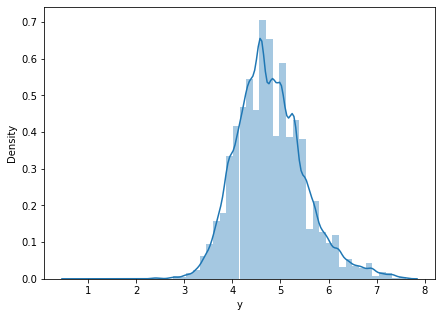

In [41]:
train_y_ac = train_y / train_X_addEDA_log_dummy["accommodates"]
#目的変数の対数log(x+1)をとる
train_y_ac_log = np.log1p(train_y_ac) #②
train_y_log = np.log1p(train_y)#③

#分布を可視化
plt.figure(figsize=(7, 5))
sns.distplot(train_y_log)

#歪度と尖度を計算
print("歪度: %f" % train_y_log.skew())
print("尖度: %f" % train_y_log.kurt())

## データセットを分ける

In [42]:
presplit_train_X = train_X_addEDA_log_dummy
presplit_train_y = train_y

In [48]:
#実際のテストサイズと同じサイズのテストデータを確保してこれでだいたいを測る
X_trainval, X_test, y_trainval, y_test = train_test_split(presplit_train_X, presplit_train_y, test_size=0.33, random_state=0)

In [49]:
train_X, valid_X, train_y, valid_y = train_test_split(X_trainval, y_trainval, test_size=0.3, random_state=0)


In [51]:
print('len(X_test)', len(train_X))
print('len(valid_X)', len(valid_X))
print('len(X_test)', len(X_test))
print('len(test)', len(test))

len(X_test) 26068
len(valid_X) 11172
len(X_test) 18343
len(test) 18528


歪度: 4.245246
尖度: 25.482912
歪度: 4.229017
尖度: 26.050940


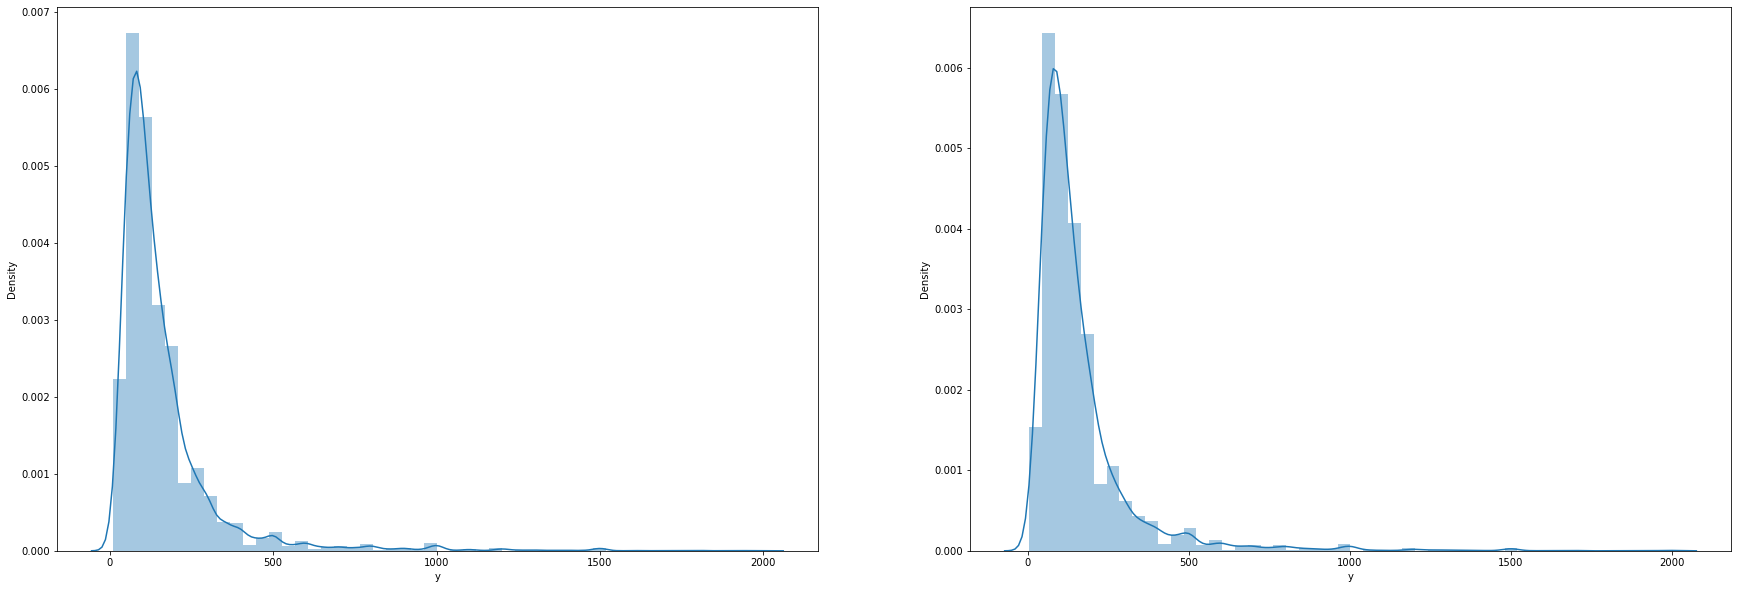

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[30, 10])

sns.distplot(train_y, ax=ax1)
#歪度と尖度を計算
print("歪度: %f" % train_y.skew())
print("尖度: %f" % train_y.kurt())

print('=============')

sns.distplot(valid_y, ax=ax2)
#歪度と尖度を計算
print("歪度: %f" % valid_y.skew())
print("尖度: %f" % valid_y.kurt())

## パラメータチューニング

In [59]:
import optuna.integration.lightgbm as op_lgb
from sklearn import datasets, model_selection

dtrain_tuning = op_lgb.Dataset(train_X.values, label=train_y.values)
dval_tuning = op_lgb.Dataset(valid_X.values, label=valid_y.values)

In [60]:
best_params, tuning_history = dict(), list()
# ハイパーパラメータサーチ&モデル構築(回帰モデル用)
tuning_params = {'objective': 'regression',
          'metric': 'rmse',
#         'boosting_type':'dart',
            'boosting_type':'gbdt',
          'num_boost_round': 5000, # 最大試行数
          'random_seed':100,
         'learning_rate': 0.01, # 学習率
         }

booster = op_lgb.train(tuning_params, 
                       dtrain_tuning, 
                       valid_sets=[dtrain_tuning, dval_tuning],
                       verbose_eval=0,
                       early_stopping_rounds=20,)

[I 2021-08-07 02:40:39,278] A new study created in memory with name: no-name-769518d4-ee6c-49fd-9040-aedd02699cd6
feature_fraction, val_score: inf:   0%|                   | 0/7 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction, val_score: 104.252587:  14%|5   | 1/7 [00:08<00:52,  8.78s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction, val_score: 104.252587:  29%|#1  | 2/7 [00:13<00:33,  6.64s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction, val_score: 104.252587:  43%|#7  | 3/7 [00:20<00:26,  6.57s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction, val_score: 104.252587:  57%|##2 | 4/7 [00:27<00:20,  6.88s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction, val_score: 104.252587:  71%|##8 | 5/7 [00:35<00:14,  7.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction, val_score: 104.252587:  86%|###4| 6/7 [00:42<00:07,  7.18s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.252587:   0%|                 | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.252587:   5%|4        | 1/20 [00:12<04:06, 12.99s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.252587:  10%|9        | 2/20 [00:26<03:55, 13.06s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.252587:  15%|#3       | 3/20 [00:31<02:38,  9.35s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.252587:  20%|#8       | 4/20 [00:44<02:53, 10.83s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.179286:  25%|##2      | 5/20 [00:54<02:42, 10.84s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.179286:  30%|##6      | 6/20 [01:14<03:13, 13.85s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.179286:  35%|###1     | 7/20 [01:31<03:10, 14.68s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  40%|###6     | 8/20 [01:44<02:50, 14.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  45%|####     | 9/20 [01:55<02:25, 13.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  50%|####    | 10/20 [02:11<02:20, 14.01s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  55%|####4   | 11/20 [02:17<01:44, 11.64s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  60%|####8   | 12/20 [02:28<01:31, 11.41s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  65%|#####2  | 13/20 [02:41<01:23, 11.89s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  70%|#####6  | 14/20 [02:52<01:10, 11.76s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 104.089272:  75%|######  | 15/20 [03:01<00:54, 10.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 103.931197:  80%|######4 | 16/20 [03:15<00:47, 11.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 103.931197:  85%|######8 | 17/20 [03:31<00:38, 12.90s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 103.931197:  90%|#######2| 18/20 [03:41<00:24, 12.13s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


num_leaves, val_score: 103.931197:  95%|#######6| 19/20 [03:47<00:10, 10.21s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:   0%|                    | 0/10 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  10%|#2          | 1/10 [00:05<00:48,  5.39s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  20%|##4         | 2/10 [00:12<00:50,  6.27s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  30%|###6        | 3/10 [00:16<00:38,  5.54s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  40%|####8       | 4/10 [00:24<00:37,  6.23s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  50%|######      | 5/10 [00:33<00:37,  7.47s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  60%|#######2    | 6/10 [00:39<00:27,  6.86s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004820 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  70%|########3   | 7/10 [00:46<00:20,  6.78s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006430 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  80%|#########6  | 8/10 [00:51<00:12,  6.40s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


bagging, val_score: 103.931197:  90%|##########8 | 9/10 [00:57<00:06,  6.24s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction_stage2, val_score: 103.931197:   0%|     | 0/6 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction_stage2, val_score: 103.931197:  17%|1| 1/6 [00:09<00:46,  9.24s[I 2021-08-07 02:46:42,188] Trial 37 finished with value: 104.16008395405449 and parameters: {'feature_fraction': 0.552}. Best is trial 37 with value: 104.16008395405449.
feature_fraction_stage2, val_score: 103.931197:  17%|1| 1/6 [00:09<00:46,  9.24s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction_stage2, val_score: 103.931197:  33%|3| 2/6 [00:18<00:37,  9.43s[I 2021-08-07 02:46:51,750] Trial 38 finished with value: 104.12600930652809 and parameters: {'feature_fraction': 0.6479999999999999}. Best is trial 38 with value: 104.12600930652809.
feature_fraction_stage2, val_score: 103.931197:  33%|3| 2/6 [00:18<00:37,  9.43s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction_stage2, val_score: 103.931197:  50%|5| 3/6 [00:28<00:29,  9.72s[I 2021-08-07 02:47:01,826] Trial 39 finished with value: 104.16385247935816 and parameters: {'feature_fraction': 0.584}. Best is trial 38 with value: 104.12600930652809.
feature_fraction_stage2, val_score: 103.931197:  50%|5| 3/6 [00:28<00:29,  9.72s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction_stage2, val_score: 103.931197:  67%|6| 4/6 [00:36<00:17,  8.83s[I 2021-08-07 02:47:09,283] Trial 40 finished with value: 104.33600284513766 and parameters: {'feature_fraction': 0.616}. Best is trial 38 with value: 104.12600930652809.
feature_fraction_stage2, val_score: 103.931197:  67%|6| 4/6 [00:36<00:17,  8.83s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction_stage2, val_score: 103.931197:  83%|8| 5/6 [00:44<00:08,  8.49s[I 2021-08-07 02:47:17,180] Trial 41 finished with value: 104.20375287027844 and parameters: {'feature_fraction': 0.6799999999999999}. Best is trial 38 with value: 104.12600930652809.
feature_fraction_stage2, val_score: 103.931197:  83%|8| 5/6 [00:44<00:08,  8.49s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


feature_fraction_stage2, val_score: 103.931197: 100%|#| 6/6 [00:53<00:00,  8.62s[I 2021-08-07 02:47:26,043] Trial 42 finished with value: 104.19562042463401 and parameters: {'feature_fraction': 0.52}. Best is trial 38 with value: 104.12600930652809.
feature_fraction_stage2, val_score: 103.931197: 100%|#| 6/6 [00:53<00:00,  8.85s
regularization_factors, val_score: 103.931197:   0%|     | 0/20 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.931197:   5%| | 1/20 [00:10<03:20, 10.54s[I 2021-08-07 02:47:36,589] Trial 43 finished with value: 104.31255137619517 and parameters: {'lambda_l1': 0.15210178648789718, 'lambda_l2': 2.5526160971761698}. Best is trial 43 with value: 104.31255137619517.
regularization_factors, val_score: 103.931197:   5%| | 1/20 [00:10<03:20, 10.54s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.931197:  10%|1| 2/20 [00:18<02:46,  9.26s[I 2021-08-07 02:47:44,955] Trial 44 finished with value: 104.4560820614753 and parameters: {'lambda_l1': 2.6761648584423554, 'lambda_l2': 0.20671184994958453}. Best is trial 43 with value: 104.31255137619517.
regularization_factors, val_score: 103.931197:  10%|1| 2/20 [00:18<02:46,  9.26s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.931197:  15%|1| 3/20 [00:26<02:26,  8.64s[I 2021-08-07 02:47:52,858] Trial 45 finished with value: 104.34950276815611 and parameters: {'lambda_l1': 1.3273207186610341e-05, 'lambda_l2': 0.0015400808812065432}. Best is trial 43 with value: 104.31255137619517.
regularization_factors, val_score: 103.931197:  15%|1| 3/20 [00:26<02:26,  8.64s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.931197:  20%|2| 4/20 [00:39<02:42, 10.14s[I 2021-08-07 02:48:05,293] Trial 46 finished with value: 103.98520308055463 and parameters: {'lambda_l1': 0.0004934716278535379, 'lambda_l2': 4.306635160662087e-08}. Best is trial 46 with value: 103.98520308055463.
regularization_factors, val_score: 103.931197:  20%|2| 4/20 [00:39<02:42, 10.14s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.931197:  25%|2| 5/20 [00:47<02:19,  9.32s[I 2021-08-07 02:48:13,150] Trial 47 finished with value: 104.32316812175699 and parameters: {'lambda_l1': 0.0002751205995970432, 'lambda_l2': 1.4860529178389834e-07}. Best is trial 46 with value: 103.98520308055463.
regularization_factors, val_score: 103.931197:  25%|2| 5/20 [00:47<02:19,  9.32s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  30%|3| 6/20 [00:58<02:19,  9.98s[I 2021-08-07 02:48:24,423] Trial 48 finished with value: 103.80515137176809 and parameters: {'lambda_l1': 0.8968589716068888, 'lambda_l2': 1.651107741480742e-05}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  30%|3| 6/20 [00:58<02:19,  9.98s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  35%|3| 7/20 [01:06<02:03,  9.47s[I 2021-08-07 02:48:32,840] Trial 49 finished with value: 104.20155304760408 and parameters: {'lambda_l1': 0.0016080176315821522, 'lambda_l2': 0.6384987936048065}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  35%|3| 7/20 [01:06<02:03,  9.47s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  40%|4| 8/20 [01:15<01:49,  9.13s[I 2021-08-07 02:48:41,252] Trial 50 finished with value: 104.29080983841627 and parameters: {'lambda_l1': 0.0005086395551217822, 'lambda_l2': 0.05155085359823766}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  40%|4| 8/20 [01:15<01:49,  9.13s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  45%|4| 9/20 [01:24<01:42,  9.32s[I 2021-08-07 02:48:50,969] Trial 51 finished with value: 104.21915835754118 and parameters: {'lambda_l1': 0.0007788074745961281, 'lambda_l2': 1.7893068825366658}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  45%|4| 9/20 [01:24<01:42,  9.32s

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  50%|5| 10/20 [01:35<01:37,  9.78[I 2021-08-07 02:49:01,779] Trial 52 finished with value: 103.99365635908951 and parameters: {'lambda_l1': 1.0365137533716421e-07, 'lambda_l2': 0.005822622926503528}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  50%|5| 10/20 [01:35<01:37,  9.78

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  55%|5| 11/20 [01:45<01:27,  9.76[I 2021-08-07 02:49:11,513] Trial 53 finished with value: 104.03764550650813 and parameters: {'lambda_l1': 5.074542666429624, 'lambda_l2': 9.062236469033381e-06}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  55%|5| 11/20 [01:45<01:27,  9.76

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  60%|6| 12/20 [01:56<01:21, 10.14[I 2021-08-07 02:49:22,498] Trial 54 finished with value: 104.12582791323115 and parameters: {'lambda_l1': 0.0966901735681344, 'lambda_l2': 6.059830235587644e-08}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  60%|6| 12/20 [01:56<01:21, 10.14

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  65%|6| 13/20 [02:07<01:12, 10.38[I 2021-08-07 02:49:33,434] Trial 55 finished with value: 104.10763247026513 and parameters: {'lambda_l1': 1.96880250512971e-08, 'lambda_l2': 9.469457136229448e-06}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  65%|6| 13/20 [02:07<01:12, 10.38

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  70%|7| 14/20 [02:18<01:03, 10.54[I 2021-08-07 02:49:44,364] Trial 56 finished with value: 104.10676354954798 and parameters: {'lambda_l1': 1.0193143339902293e-06, 'lambda_l2': 7.98340366125916e-06}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  70%|7| 14/20 [02:18<01:03, 10.54

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  75%|7| 15/20 [02:27<00:51, 10.27[I 2021-08-07 02:49:54,010] Trial 57 finished with value: 104.10549214868688 and parameters: {'lambda_l1': 0.04930864122981093, 'lambda_l2': 1.335658054332124e-08}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  75%|7| 15/20 [02:27<00:51, 10.27

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  80%|8| 16/20 [02:36<00:39,  9.80[I 2021-08-07 02:50:02,693] Trial 58 finished with value: 104.1674860406825 and parameters: {'lambda_l1': 2.6709468893061007e-05, 'lambda_l2': 0.00010072892179153674}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  80%|8| 16/20 [02:36<00:39,  9.80

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  85%|8| 17/20 [02:44<00:28,  9.36[I 2021-08-07 02:50:11,034] Trial 59 finished with value: 104.15721293531048 and parameters: {'lambda_l1': 0.008042487188559124, 'lambda_l2': 4.5236386791637536e-07}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  85%|8| 17/20 [02:44<00:28,  9.36

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  90%|9| 18/20 [02:55<00:19,  9.62[I 2021-08-07 02:50:21,270] Trial 60 finished with value: 104.09657398384081 and parameters: {'lambda_l1': 2.9076862918462725, 'lambda_l2': 8.64610187380676e-07}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  90%|9| 18/20 [02:55<00:19,  9.62

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151:  95%|9| 19/20 [03:03<00:09,  9.18[I 2021-08-07 02:50:29,424] Trial 61 finished with value: 104.2492485294287 and parameters: {'lambda_l1': 2.811550809493865e-05, 'lambda_l2': 0.00011706004806440226}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151:  95%|9| 19/20 [03:03<00:09,  9.18

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


regularization_factors, val_score: 103.805151: 100%|#| 20/20 [03:13<00:00,  9.51[I 2021-08-07 02:50:39,690] Trial 62 finished with value: 104.19628461855145 and parameters: {'lambda_l1': 0.9099390900102886, 'lambda_l2': 2.503932196552187e-08}. Best is trial 48 with value: 103.80515137176809.
regularization_factors, val_score: 103.805151: 100%|#| 20/20 [03:13<00:00,  9.68
min_data_in_leaf, val_score: 103.805151:   0%|            | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


min_data_in_leaf, val_score: 103.805151:  20%|8   | 1/5 [00:13<00:53, 13.26s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


min_data_in_leaf, val_score: 103.805151:  40%|#6  | 2/5 [00:27<00:41, 13.98s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


min_data_in_leaf, val_score: 103.805151:  60%|##4 | 3/5 [00:39<00:25, 12.92s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


min_data_in_leaf, val_score: 103.805151:  80%|###2| 4/5 [00:51<00:12, 12.56s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6559
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Info] Start training from score 160.194415


min_data_in_leaf, val_score: 103.805151: 100%|####| 5/5 [00:59<00:00, 11.89s/it]


In [61]:
print('Best Params:', booster.params)
print('Best Iteration:', booster.best_iteration)
print('Best Score:', booster.best_score)

Best Params: {'objective': 'regression', 'metric': 'rmse', 'boosting_type': 'gbdt', 'random_seed': 100, 'learning_rate': 0.01, 'feature_pre_filter': False, 'lambda_l1': 0.8968589716068888, 'lambda_l2': 1.651107741480742e-05, 'num_leaves': 97, 'feature_fraction': 0.6, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20, 'num_iterations': 5000, 'early_stopping_round': 20}
Best Iteration: 1387
Best Score: defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('rmse', 54.50761633984266)]), 'valid_1': OrderedDict([('rmse', 103.80515137176809)])})


## 学習

In [62]:
lgb_train = lgb.Dataset(train_X, train_y) #(DataFrame, Series)
lgb_valid = lgb.Dataset(valid_X, valid_y, reference=lgb_train) #(DataFrame, Series)

In [63]:
lgbm_params = {
    "objective":"regression",
    #'boosting_type':'dart',
    'boosting_type':'gbdt',
    "metric":"rmse",
   "verbose":1000,
    "random_seed":0,
    'learning_rate': 0.001,
        }
lgbm_params.update(booster.params)
lgbm_params['num_leaves'] = int(lgbm_params['num_leaves'])
lgbm_params['min_child_samples'] = int(lgbm_params['min_child_samples'])
lgbm_params['bagging_freq'] = int(lgbm_params['bagging_freq'])

print(lgbm_params)

{'objective': 'regression', 'boosting_type': 'gbdt', 'metric': 'rmse', 'verbose': 1000, 'random_seed': 100, 'learning_rate': 0.01, 'feature_pre_filter': False, 'lambda_l1': 0.8968589716068888, 'lambda_l2': 1.651107741480742e-05, 'num_leaves': 97, 'feature_fraction': 0.6, 'bagging_fraction': 1.0, 'bagging_freq': 0, 'min_child_samples': 20, 'num_iterations': 5000, 'early_stopping_round': 20}


In [64]:
FIT_PARAMS_LGB = {"num_boost_round": 10000, "early_stopping_rounds": 1000,}

evaluation_results  = {}  # to record evaluation results for plotting
model = lgb.train(lgbm_params, 
                  lgb_train,
                   **FIT_PARAMS_LGB,
                  
                  valid_names=['train', 'valid'], 
                  valid_sets=[lgb_train, lgb_valid],
                 evals_result = evaluation_results,)

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.952944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.636201
[LightGBM] [Debug] init for col-wise cost 0.005536 seconds, init for row-wise cost 0.005551 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 6742
[LightGBM] [Info] Number of data points in the train set: 26068, number of used features: 189
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 160.194415
[LightGBM] [Debug] Trained a tree with leaves = 97 and depth = 12
[1]	train's rmse: 167.366	valid's rmse: 164.937
Training un

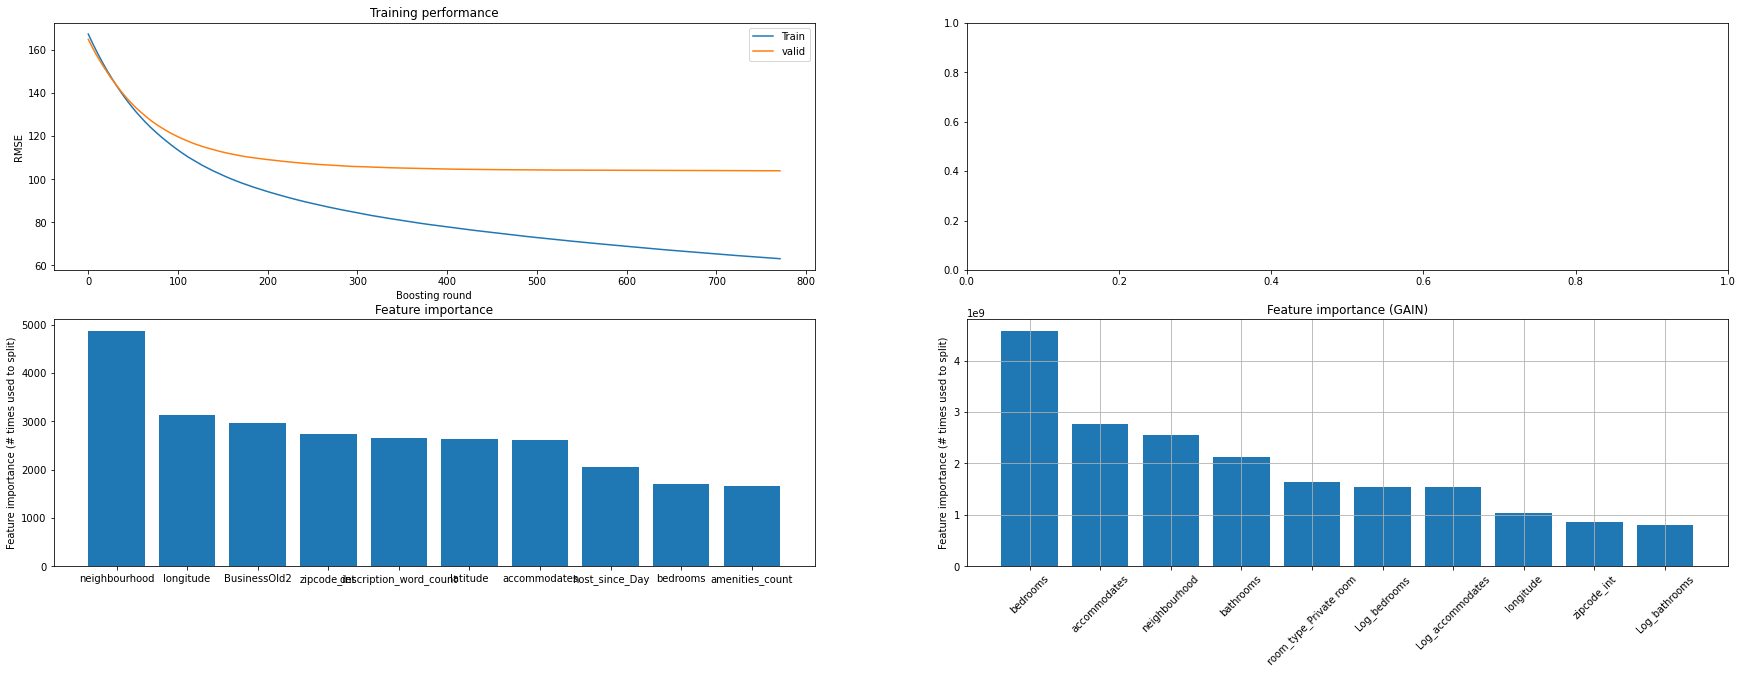

In [65]:
fig, axs = plt.subplots(2, 2, figsize=[30, 10])

# Plot the log loss during training
axs[0,0].plot(evaluation_results['train']['rmse'], label='Train')
axs[0,0].plot(evaluation_results['valid']['rmse'], label='valid')
axs[0,0].set_ylabel('RMSE')
axs[0,0].set_xlabel('Boosting round')
axs[0,0].set_title('Training performance')
axs[0,0].legend()

# Plot feature importance
importances = pd.DataFrame({'features': train_X.columns, 
                            'importance': model.feature_importance()}).sort_values('importance', ascending=False).head(10)
axs[1,0].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1,0].set_xticks(np.arange(len(importances)))
axs[1,0].set_xticklabels(importances['features'])
axs[1,0].set_ylabel('Feature importance (# times used to split)')
axs[1,0].set_title('Feature importance')
plt.xticks(rotation=45)

# Plot feature importance
importances = pd.DataFrame({'features': train_X.columns, 
                            'importance': model.feature_importance(importance_type='gain')}).sort_values('importance', ascending=False).head(10)
axs[1,1].bar(x=np.arange(len(importances)), height=importances['importance'])
axs[1,1].set_xticks(np.arange(len(importances)))
axs[1,1].set_xticklabels(importances['features'])
axs[1,1].set_ylabel('Feature importance (# times used to split)')
axs[1,1].set_title('Feature importance (GAIN)')

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

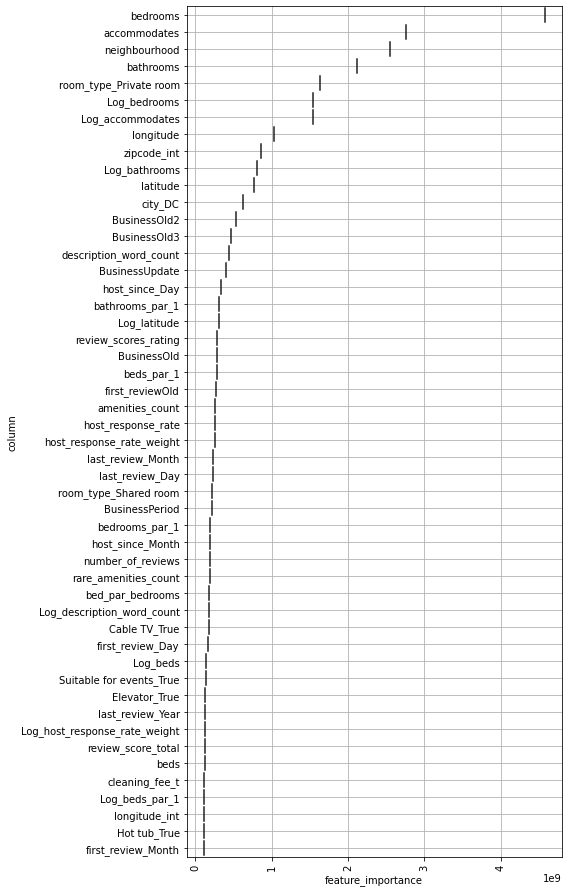

In [66]:
top_n=50
feature_importance_df = pd.DataFrame()

_df = pd.DataFrame()
_df['feature_importance'] = model.feature_importance(importance_type='gain')
_df['column'] = train_X.columns
feature_importance_df = pd.concat([feature_importance_df, _df], axis=0, ignore_index=True)

order = feature_importance_df.groupby('column').sum()[['feature_importance']].sort_values('feature_importance', ascending=False).index[:top_n]

fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
sns.boxenplot(data=feature_importance_df,
              x='feature_importance',
              y='column',
              order=order,
              ax=ax,
              palette='viridis',
              orient='h')
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='x', rotation=90)
ax.grid()
fig.tight_layout()

# モデルの推論

In [73]:
y_pred = pd.Series(model.predict(valid_X.values,num_iteration=model.best_iteration))

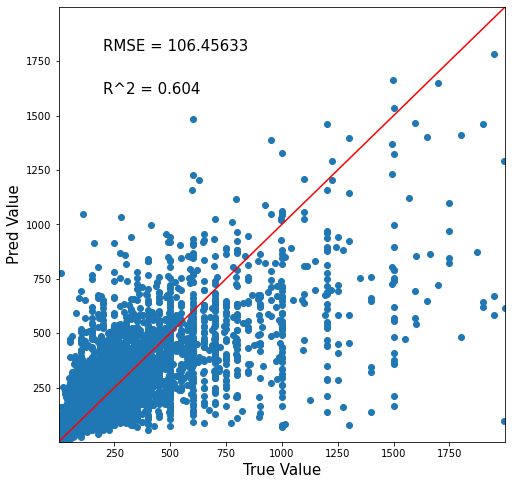

In [74]:
pred_df = pd.concat([valid_y.reset_index(drop=True), y_pred], axis=1)
pred_df.columns = ['true', 'pred']
# 可視化
gather_function.True_Pred_map(pred_df)

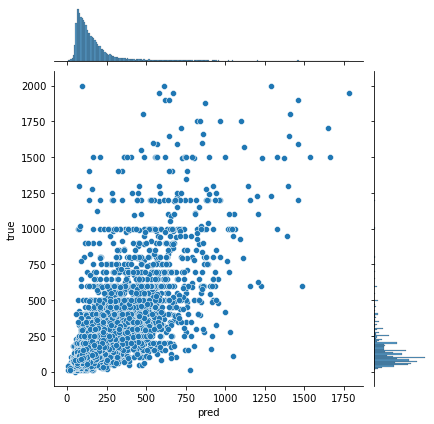

In [72]:
sns.jointplot(data=pred_df, x="pred", y="true")

# テストデータ

In [35]:
test_x.head()

,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,Feel free to book INSTANTLY. You can check-in ...,2017-01-09,t,f,100%,2016-08-23,t,2017-09-25,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,The guest house is close to: Equinox West Holl...,2016-08-17,t,t,100%,2014-09-03,f,2017-05-02,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,Private room in a three bedroom apartment in N...,NaN,t,t,100%,2012-10-17,f,NaN,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,The apartment is located in historic Bed Stuy ...,NaN,t,t,NaN,2013-01-23,f,NaN,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,"Our cozy, pet friendly one bedroom apartment/l...",2015-08-01,t,t,100%,2014-12-28,f,2016-09-11,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


## 前処理

In [36]:
df_ori_test, _ = gather_function.preprocessing(test_x, max_amenities_list)


NameError: name 'test' is not defined

In [ ]:
df_ori_test.head()

## 対数変換

In [ ]:
tmp = pd.DataFrame()
tmp[num_col_feat_list] = pt.transform(df[num_col_feat_list])
tmp = tmp.add_prefix('Log_')
df_ori_test[tmp.columns] = tmp

## ダミー変数化

In [ ]:
def fit_LabelEncoding(categorical_columns, training_df, Test_df):
    
    for column in tqdm(categorical_columns):
        df = Test_df.copy()
        le_column = LabelEncoder().fit(training_df[column].fillna('Na'))
        mask = df[column].isin(le_column.classes_)
        column_new_data = df[column].mask(mask).unique()
        le_column.classes_ = np.concatenate([le_column.classes_, column_new_data])
        df[column] = le_column.transform(df[column])
        
    df[categorical_columns] = df[categorical_columns].astype('category')

    return df

def fit_dummy(categorical_columns, training_df, Test_df):
    df = Test_df.copy()
    fit_dummy_columns = []
    for i in training_df.select_dtypes(include=object).columns.tolist():
        if i not in categorical_columns:
            fit_dummy_columns.append(i)
            
    for column in tqdm(training_df[fit_dummy_columns].columns):
        fit_type = training_df[column].dropna().unique()
        #NA = training_df[column].value_counts(dropna=False).index[0]
        df[column] = pd.Categorical(df[column], fit_type)
        
    df = pd.get_dummies(df, columns=fit_dummy_columns, drop_first=True)
    return df

In [ ]:
df_ori_test_dummy = fit_LabelEncoding(categorical_columns, train_X_addEDA, df_ori_test)
df_ori_test_dummy = fit_dummy(categorical_columns, train_X_addEDA, df_ori_test_dummy)

In [ ]:
df_ori_test_dummy.head()

# Submit

In [ ]:
sub_preds = pd.Series(model.predict(df_ori_test_dummy.values,num_iteration=model.best_iteration))

In [ ]:
#submit用のCSVを作成
sub = pd.DataFrame({"id":original_test_data['id'], "y":sub_preds})
print('sub["y"].isnull().sum()=', sub['y'].isnull().sum())
sub

In [ ]:
sub.to_csv('fourth_submission.csv', header=False, index=False)